In [25]:
from utils import get_batch, hybrid_fit
import time
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np
from PIA import PIA
import torch
import copy
import os
import mat73
import scipy.io as sio
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from skimage import morphology


## Testing IVIM Model on Random Set of 25000 Samples

In [28]:
test, f_test_true, Dt_test_true, Dstar_test_true, _ = get_batch(25000, noise_sdt=0.05)
test = test.detach().cpu().numpy()

start = time.time()

f_pred, Dt_pred, Dstar_pred = hybrid_fit(test)

end = time.time()
print(f'Hybrid IVIM fitting takes {end - start:.2f} seconds')

Hybrid IVIM fitting takes 93.26 seconds


## Lets plot the distributions

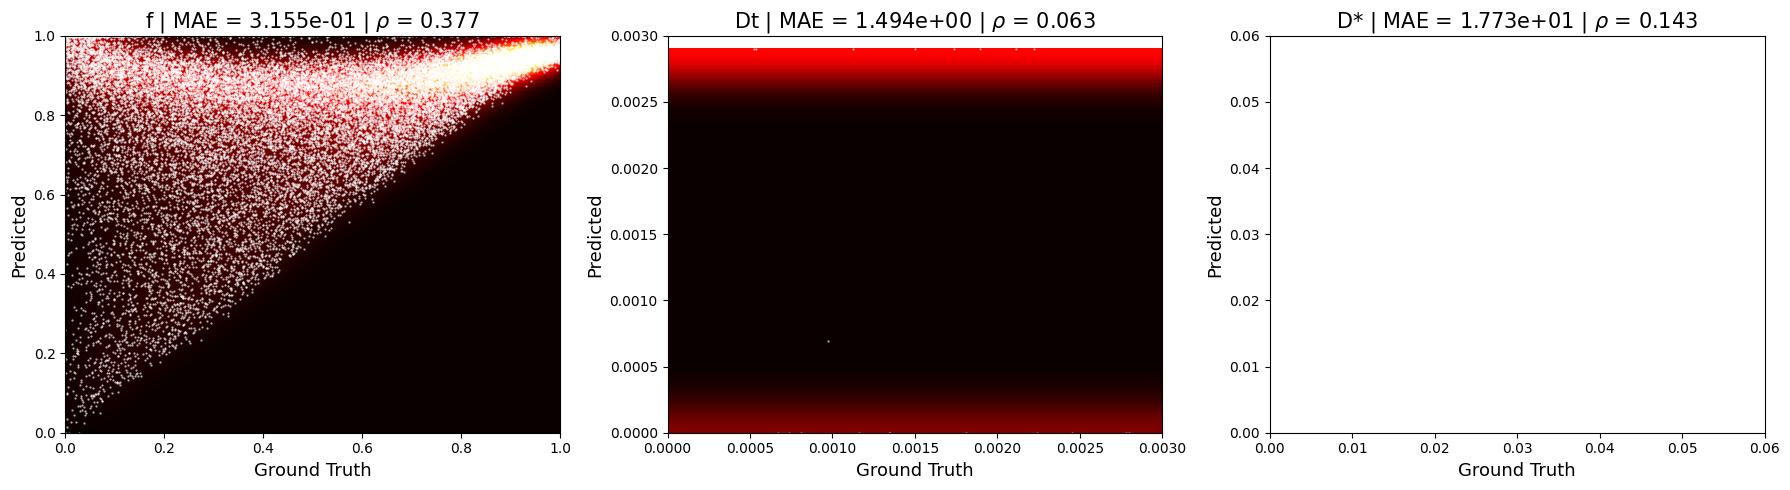

In [29]:


fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Oarameters and bounds
titles = ['f', 'Dt', 'D*']
ylims = [(0, 1), (0, 0.003), (0, 0.06)]

# Ground truth and lists of predicted
gt_params = [f_test_true, Dt_test_true, Dstar_test_true]
pred_params = [f_pred, Dt_pred, Dstar_pred]

for i in range(3):
    x = gt_params[i].cpu().numpy()
    y = pred_params[i]

    nbins = 300
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    ax[i].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap="hot", shading='auto')
    ax[i].scatter(x, y, s=0.3, color="white", alpha=0.7)

    mae = np.mean(np.abs(x - y))
    corr = np.corrcoef(x, y)[0, 1]

    ax[i].set_title(fr'{titles[i]} | MAE = {mae:.3e} | $\rho$ = {corr:.3f}', fontsize=15)
    ax[i].set_xlabel('Ground Truth', fontsize=13)
    ax[i].set_ylabel('Predicted', fontsize=13)
    ax[i].set_xlim(ylims[i])
    ax[i].set_ylim(ylims[i])

plt.tight_layout()
plt.show()


## Test PIA on the same set of 25000 test samples